In [6]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

In [8]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operation1: str
    num3: int
    num4: int
    operation2: str
    answer1: int
    answer2: int

In [9]:
def add_node(state: AgentState) -> AgentState:
    """Node to add"""

    state['answer1'] = state.get("num1", 0) + state.get("num2", 0)

    return state

def subtract_node(state: AgentState) -> AgentState:
    """Node to subtract"""

    state['answer1'] = state.get("num1", 0) - state.get("num2", 0)

    return state

def multiple_node(state: AgentState) -> AgentState:
    """Node to multiple"""

    state['answer2'] = state.get("num3", 0) * state.get("num4", 0)

    return state

def divide_node(state: AgentState) -> AgentState:
    """Node to divide"""

    state['answer2'] = state.get("num3", 1) // state.get("num4", 1)

    return state

def router1(state: AgentState) -> AgentState:
    """Condition node to determin which operation to perform, to add or subtract"""

    if state.get("operation1", "+") == "+": return "add_operation"
    elif state["operation1"] == "-": return "subtract_operation"

def router2(state: AgentState) -> AgentState:
    """Condition node to determin which operation to perform, to multiple or divide"""

    if state.get("operation2", "*") == "*": return "multiple_operation"
    elif state["operation2"] == "/": return "divide_operation"



In [10]:
graph = StateGraph(AgentState)

graph.add_node("add_node", add_node)
graph.add_node("subtract_node", subtract_node)
graph.add_node("router1", lambda state:state)

graph.add_node("multiple_node", multiple_node)
graph.add_node("divide_node", divide_node)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    router1,
    {
        "add_operation": "add_node",
        "subtract_operation": "subtract_node"
    }
)

graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")


graph.add_conditional_edges(
    "router2",
    router2,
    {
        "multiple_operation": "multiple_node",
        "divide_operation": "divide_node"
    }
)

graph.add_edge("multiple_node", END)
graph.add_edge("divide_node", END)

app = graph.compile()


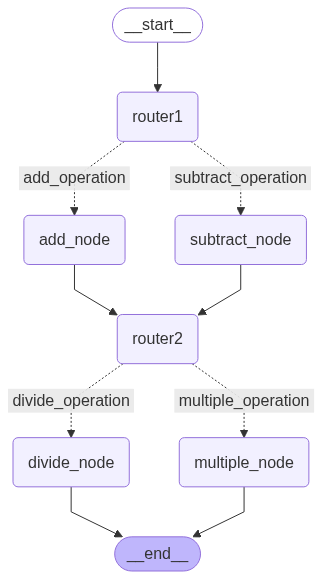

In [11]:
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
inputState = { 
    "num1": 10, "num2": 2, "operation1": "+",
    "num3": 19, "num4": 5, "operation2": "/"
    }

result = app.invoke(inputState)
print("Answer1:: ", result["answer1"])
print("Answer2:: ", result["answer2"])

Answer1::  12
Answer2::  3
